In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [46]:
%load_ext memory_profiler

In [28]:
def sm():
    """исследуемая функция"""
    sm = 0
    for i in range(1000):
        sm += i
    return sm


In [4]:
%timeit sm()

70.9 µs ± 3.74 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
%memit sm()

peak memory: 119.87 MiB, increment: 0.11 MiB


In [3]:
%prun sm()


In [44]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [49]:
%mprun -f sm

ERROR: Could not find file <ipython-input-28-1c6147451ae2>
NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.



In [5]:
%lprun -f sm()

C:\ProgramData\Anaconda3\lib\site-packages\line_profiler\line_profiler.py:344: UserWarning: Could not extract a code object for the object 499500
  profile = LineProfiler(*funcs)


In [6]:
import line_profiler
lp = line_profiler.LineProfiler()
lp.add_function(sm)
lp.runctx('sm()', locals=locals(), globals=globals())
lp.print_stats()

Timer unit: 3.3094e-07 s

Total time: 0.00104279 s
File: <ipython-input-2-4a243120c7e7>
Function: sm at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def sm():
     2         1          5.0      5.0      0.2      sm = 0
     3      1001       1508.0      1.5     47.9      for i in range(1000):
     4      1000       1637.0      1.6     52.0          sm += i
     5         1          1.0      1.0      0.0      return sm



In [39]:
arr1 = pd.DataFrame(np.random.rand(100, 100))
arr2 = pd.DataFrame(np.random.rand(100, 100))
arr3 = pd.DataFrame(np.random.rand(100, 100))

In [8]:
%%timeit
for i in range(100):
    for j in range(100):
        arr3[i][j] = arr1[i][j] / arr2[i][j]

916 ms ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%%memit
arr4 = arr1 / arr2

peak memory: 122.59 MiB, increment: 0.57 MiB


In [43]:
%lsmagic


Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %lprun  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %

In [42]:
?arr1.add

In [105]:
import scipy

In [132]:
scipy.stats.shapiro(df)

(0.9995960593223572, 0.8290085792541504)

In [131]:
scipy.stats.normaltest(df)

NormaltestResult(statistic=array([4.10452135, 0.76544463, 1.78599902]), pvalue=array([0.1284442 , 0.68200226, 0.40942583]))

In [172]:
scipy.stats.ttest_ind(df.a[:500], df.a[500:])

Ttest_indResult(statistic=-0.00378764875375555, pvalue=0.9969786577148051)

In [194]:
df['d'] = df.a + 0.1 * abs(df.b)
df

,a,b,c,d
0,0.029219,-2.903424,-0.500705,0.319561
1,-0.581401,-0.691049,0.618647,-0.512296
2,1.048681,-1.142982,0.863099,1.162979
3,-0.674633,0.932612,-0.234586,-0.581372
4,-0.226700,0.619903,0.233450,-0.164710
...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696
996,0.230917,1.234558,-1.935713,0.354372
997,-0.606310,-2.342535,-0.613960,-0.372057
998,0.238668,0.246697,-0.116900,0.263338


In [195]:
scipy.stats.ttest_rel(df['a'], df['d'])

Ttest_relResult(statistic=-41.670442565038016, pvalue=9.760891545699535e-221)

In [198]:
np.mgrid[-3:3:7j, -3:3:7j]

array([[[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.],
        [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]],

       [[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]])

In [205]:
arr = np.arange(6)
arr.resize(2, 3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [206]:
df['e'] = df['d'] / 0
df

,a,b,c,d,e
0,0.029219,-2.903424,-0.500705,0.319561,inf
1,-0.581401,-0.691049,0.618647,-0.512296,-inf
2,1.048681,-1.142982,0.863099,1.162979,inf
3,-0.674633,0.932612,-0.234586,-0.581372,-inf
4,-0.226700,0.619903,0.233450,-0.164710,-inf
...,...,...,...,...,...
995,-0.810591,-1.918957,0.458101,-0.618696,-inf
996,0.230917,1.234558,-1.935713,0.354372,inf
997,-0.606310,-2.342535,-0.613960,-0.372057,-inf
998,0.238668,0.246697,-0.116900,0.263338,inf


In [211]:
np.random.randint(0, 10, size=100)

array([8, 3, 0, 5, 1, 6, 5, 3, 6, 6, 3, 0, 7, 2, 6, 7, 1, 7, 0, 7, 2, 7,
       1, 2, 3, 8, 3, 3, 1, 0, 0, 1, 4, 3, 8, 9, 9, 6, 5, 8, 6, 0, 8, 0,
       8, 2, 9, 6, 0, 0, 6, 3, 4, 8, 2, 2, 4, 5, 3, 2, 9, 5, 7, 0, 4, 7,
       9, 6, 0, 9, 8, 2, 3, 8, 2, 1, 1, 4, 9, 5, 7, 1, 5, 7, 5, 7, 2, 0,
       8, 1, 7, 6, 6, 5, 2, 0, 1, 0, 9, 5])

In [7]:
from tqdm import tqdm
import time

pbar = tqdm(["a","b","c","d", "e", "f", "g"])
for c in pbar:
    if c == 'c':
        time.sleep(1.5)
    time.sleep(0.5)
    pbar.set_description("Processing %s"%c)

Processing g: 100%|██████████████████████████████████████████████████████████████████████| 7/7 [00:05<00:00,  1.38it/s]


In [4]:
from tqdm.notebook import tqdm
import time

#totalParameter установка общей длины индикатора выполнения
with tqdm(total=100) as pbar:
  for i in range(100):
    time.sleep(0.05)
    # Обновлять длину индикатора выполнения каждый раз
    pbar.update(1)

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

df = pd.DataFrame(np.random.randint(0, 100, (10000000, 6)))

# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`
# (can use `tqdm.gui.tqdm`, `tqdm.notebook.tqdm`, optional kwargs, etc.)
# tqdm.pandas(desc="my bar!")
tqdm.pandas()

# Now you can use `progress_apply` instead of `apply`
# and `progress_map` instead of `map`
df.progress_apply(lambda x: x**2)
# can also groupby:
# df.groupby(0).progress_apply(lambda x: x**2)

In [3]:
from tqdm.notebook import trange, tqdm
from time import sleep

for i in trange(3, desc='1st loop'):
    for j in tqdm(range(100), desc='2nd loop'):
        sleep(0.01)

In [5]:
pd.DataFrame(np.random.randint(0, 11, (3, 3)), columns=list('ABC'))

,A,B,C
0,4,1,4
1,5,1,4
2,9,7,2


In [14]:
df = pd.DataFrame({'gender': np.random.choice(['m', 'f'], size=50), 'math_score': np.random.randint(0, 101, 50)})
df

,gender,math_score
0,f,61
1,f,63
2,f,52
3,f,67
4,m,92
5,m,19
6,m,74
7,f,3
8,m,98
9,m,40


In [18]:
df.sort_values(['gender','math_score'], ascending=[True, False])\
    .groupby('gender')\
    .head(5)

,gender,math_score
44,f,97
49,f,96
10,f,93
18,f,90
20,f,89
16,m,100
8,m,98
21,m,98
26,m,94
4,m,92


In [21]:
df.values.nbytes

800

In [33]:
df = pd.DataFrame(np.random.randint(0, 100, (10000, 100)))

In [4]:
from tqdm import tqdm
tqdm.pandas()

In [35]:
df.progress_applymap(lambda x: np.sin(x))
# progress_map()

100%|████████████████████████████| 1000000/1000000 [00:04<00:00, 209149.29it/s]


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.992873,-0.536573,0.017702,0.670229,0.920026,-0.026551,0.296369,-0.905578,0.412118,-0.966118,...,0.963795,0.893997,0.901788,0.762558,0.999912,-0.544021,-0.245252,0.656987,-0.676772,0.986628
1,-0.132352,0.017702,-0.750987,-0.993889,-0.756802,0.656987,0.436165,0.551427,-0.993889,-0.916522,...,0.656987,-0.831775,-0.676772,-0.905578,0.989358,-0.428183,0.436165,0.999520,0.412118,0.992873
2,-0.905578,-0.831775,0.986628,0.395925,0.296369,-0.558789,-0.821818,0.395925,-0.404038,0.762558,...,0.733190,0.826829,0.989358,-0.304811,0.826829,-0.176076,-0.643538,0.968364,0.149877,-0.756802
3,-0.444113,-0.245252,0.513978,-0.821818,0.745113,0.990607,0.920026,0.566108,0.850904,-0.905578,...,0.105988,0.270906,0.395925,0.983588,-0.923458,-0.158623,0.551427,0.270906,-0.245252,0.826829
4,0.986628,-0.287903,0.513978,-0.750987,-0.428183,-0.855520,-0.026551,-0.176076,-0.026551,0.656987,...,-0.768255,-0.905578,-0.961397,-0.821818,-0.245252,-0.132352,-0.287903,-0.573382,0.773891,0.860069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.132352,0.149877,0.683262,-0.008851,0.035398,-0.521551,-0.999990,-0.663634,0.990607,0.105988,...,-0.966118,-0.404038,0.650288,0.529083,-0.387782,-0.855520,-0.643538,-0.916522,-0.158623,0.745113
9996,0.912945,-0.750987,0.412118,0.636738,-0.993889,-0.279415,-0.676772,-0.404038,-0.739181,-0.404038,...,0.893997,-0.245252,-0.114785,-0.629888,-0.026551,-0.544021,-0.831775,-0.846220,0.253823,-0.953753
9997,-0.916522,-0.988032,-0.663634,-0.831775,0.999520,0.893997,-0.262375,-0.629888,-0.988032,-0.988032,...,0.000000,-0.132352,0.566108,-0.387782,-0.821818,0.920026,-0.663634,-0.750987,0.951055,0.566108
9998,0.762558,-0.629888,-0.279415,0.017702,-0.676772,-0.132352,0.035398,-0.573382,0.836656,0.841471,...,-0.262375,-0.521551,-0.287903,0.956376,0.893997,0.683262,-0.988032,-0.008851,0.270906,0.745113


In [31]:
df[0].progress_map(lambda x: np.sin(x))

100%|████████████████████████████████| 10000/10000 [00:00<00:00, 161280.93it/s]


0       0.683262
1      -0.923458
2      -0.999755
3      -0.387782
4      -0.993889
          ...   
9995   -0.993889
9996   -0.026551
9997    0.683262
9998   -0.905578
9999   -0.026551
Name: 0, Length: 10000, dtype: float64

In [6]:
def palindrome_check(s):
    return s == s[::-1]

palindrome_check('dsfgads')

False

In [12]:
def anagram_check(s1, s2):
    return sorted(s1.lower()) == sorted(s2.lower())

anagram_check('песнь', 'снедь')

False

In [20]:
def rle_encode(s):
    answer = ''
    char_now = s[0]
    char_amount = 1

    for char in s[1:]:
        if char == char_now:
            char_amount += 1
        else:
            answer += str(char_amount) + char_now
            char_now = char
            char_amount = 1
    
    answer += str(char_amount) + char_now
    char_now = char
    char_amount = 1
    
    return answer

rle_encode('WWWWWWWWWBBBWWWWWWWWWWWWWWWWWWWWWWWWBWWWWWWWWWWWWWW')

'9W3B24W1B14W'

In [1]:
def print_hello(name: str, upper: bool = False) -> None:
    print(f'Hello, {name}')
# def __init__(self, x: int, y: int) -> None:


title: str
name: str = 'John'

name = 10
title = [2, 5]

print(name)
print_hello(name)

10
Hello, 10


In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [4]:
q_1, q_3 = df.distance.quantile([0.25, 0.75])

In [5]:
diff_3_1 = q_3 - q_1 
up_thresh = q_3 + 1.5 * diff_3_1
low_thresh = q_1 - 1.5 * diff_3_1
low_thresh, up_thresh

(-2.3649999999999998, 6.555)

In [6]:
df.distance[(df.distance > low_thresh) * (df.distance < up_thresh)]

0       1.60
1       0.79
2       1.37
4       2.16
5       0.49
        ... 
6426    0.71
6428    0.75
6430    4.14
6431    1.12
6432    3.85
Name: distance, Length: 5699, dtype: float64

In [8]:
df.distance[df.distance.between(low_thresh, up_thresh)]

0       1.60
1       0.79
2       1.37
4       2.16
5       0.49
        ... 
6426    0.71
6428    0.75
6430    4.14
6431    1.12
6432    3.85
Name: distance, Length: 5699, dtype: float64

In [4]:
df = df.loc[:, 'distance':'total'].copy()

In [5]:
standard_deviations = 3
df1 = df[df.apply(lambda x: (x - x.mean()).abs() / x.std() < standard_deviations).all(axis=1)]

In [6]:
df1

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30
2,1.37,7.5,2.36,0.0,14.16
3,7.70,27.0,6.15,0.0,36.95
4,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...
6427,7.07,20.0,0.00,0.0,20.00
6428,0.75,4.5,1.06,0.0,6.36
6430,4.14,16.0,0.00,0.0,17.30
6431,1.12,6.0,0.00,0.0,6.80


In [27]:
standard_deviations = 3
df2 = df[df.transform(lambda x: np.abs(x - x.mean()) / x.std() < standard_deviations).all(axis=1)]

In [28]:
df2

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30
2,1.37,7.5,2.36,0.0,14.16
3,7.70,27.0,6.15,0.0,36.95
4,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...
6427,7.07,20.0,0.00,0.0,20.00
6428,0.75,4.5,1.06,0.0,6.36
6430,4.14,16.0,0.00,0.0,17.30
6431,1.12,6.0,0.00,0.0,6.80


In [30]:
(df1 == df2).all().all()

True

In [7]:
from scipy.stats import zscore
df1 = df[(zscore(df).abs() < 3).all(axis=1)]

In [8]:
df1

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30
2,1.37,7.5,2.36,0.0,14.16
3,7.70,27.0,6.15,0.0,36.95
4,2.16,9.0,1.10,0.0,13.40
...,...,...,...,...,...
6427,7.07,20.0,0.00,0.0,20.00
6428,0.75,4.5,1.06,0.0,6.36
6430,4.14,16.0,0.00,0.0,17.30
6431,1.12,6.0,0.00,0.0,6.80


In [36]:
df3 = df.loc[:10].copy()
df4 = df3.loc[:1]
df5 = df3.loc[:1]

In [38]:
df4

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [39]:
df5

,distance,fare,tip,tolls,total
0,1.60,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [40]:
df4.loc[0, 'distance'] = 100500
df4

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,distance,fare,tip,tolls,total
0,100500.00,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [42]:
df5

,distance,fare,tip,tolls,total
0,100500.00,7.0,2.15,0.0,12.95
1,0.79,5.0,0.00,0.0,9.30


In [43]:
df4 is df5

False

In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [6]:
df.head(10).style.background_gradient()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.600000,7.000000,2.150000,0.000000,12.950000,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.790000,5.000000,0.000000,0.000000,9.300000,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.370000,7.500000,2.360000,0.000000,14.160000,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.700000,27.000000,6.150000,0.000000,36.950000,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.160000,9.000000,1.100000,0.000000,13.400000,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.490000,7.500000,2.160000,0.000000,12.960000,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.650000,13.000000,2.000000,0.000000,18.800000,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.400000,8.500000,0.000000,0.000000,11.800000,yellow,nan,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.630000,15.000000,1.000000,0.000000,19.300000,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.520000,8.000000,1.000000,0.000000,13.300000,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


In [9]:
df.head(10).style.bar(subset=['distance', 'total'], color='#d65f5f', align='mid')

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.600000,7.000000,2.150000,0.000000,12.950000,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.790000,5.000000,0.000000,0.000000,9.300000,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.370000,7.500000,2.360000,0.000000,14.160000,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.700000,27.000000,6.150000,0.000000,36.950000,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.160000,9.000000,1.100000,0.000000,13.400000,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.490000,7.500000,2.160000,0.000000,12.960000,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.650000,13.000000,2.000000,0.000000,18.800000,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.400000,8.500000,0.000000,0.000000,11.800000,yellow,nan,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.630000,15.000000,1.000000,0.000000,19.300000,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.520000,8.000000,1.000000,0.000000,13.300000,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


Вам необходимо:
- Объединить все датафреймы в один
- Удалить строки, где есть хотя бы один пропуск
- Добавить строку Mean в конец датафрейма, в которой будет рассчитано среднее значение по каждому из столбцов

In [1]:
import pandas as pd

In [2]:
df1 = [
    {'page1': 1, 'page2': 25, 'page3': 3}, 
    {'page1': 4, 'page2': 58, 'page3': 1}, 
    {'page1': 1.5, 'page2': 8, 'page3': 0.5}
    ]

df2 = [
     {'page1': 2, 'page2': 11, 'page3': None}, 
     {'page1': 5, 'page2': 21, 'page3': 5}, 
     {'page1': 0.1, 'page2': 38, 'page3': 15}
     ]

df3 = [
     {'page1': 2, 'page2': 11, 'page3': 40}, 
     {'page1': 5, 'page2': 15, 'page3': None}, 
     {'page1': 4, 'page2': 21, 'page3': 13}
     ]

df1, df2, df3 = [pd.DataFrame(df) for df in [df1, df2, df3]]

In [10]:
df = pd.concat((df1, df2, df3)).reset_index(drop=True)
df

,page1,page2,page3
0,1.0,25,3.0
1,4.0,58,1.0
2,1.5,8,0.5
3,2.0,11,NaN
4,5.0,21,5.0
5,0.1,38,15.0
6,2.0,11,40.0
7,5.0,15,NaN
8,4.0,21,13.0


In [12]:
df = df.dropna()

In [15]:
df.loc['Mean'] = (df.page1.mean(), df.page1.mean(), df.page1.mean())

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [16]:
df

,page1,page2,page3
0,1.000000,25.000000,3.000000
1,4.000000,58.000000,1.000000
2,1.500000,8.000000,0.500000
4,5.000000,21.000000,5.000000
5,0.100000,38.000000,15.000000
6,2.000000,11.000000,40.000000
8,4.000000,21.000000,13.000000
Mean,2.514286,2.514286,2.514286


In [19]:
class Answer:
    def calcMean(self, df1, df2, df3):
        df = pd.concat((df1, df2, df3))
        df = df.dropna()
        df.loc['Mean'] = (df.page1.mean(), df.page2.mean(), df.page3.mean())
        return df

In [20]:
ans = Answer()
ans.calcMean(df1, df2, df3)

,page1,page2,page3
0,1.000000,25.0,3.000000
1,4.000000,58.0,1.000000
2,1.500000,8.0,0.500000
1,5.000000,21.0,5.000000
2,0.100000,38.0,15.000000
0,2.000000,11.0,40.000000
2,4.000000,21.0,13.000000
Mean,2.514286,26.0,11.071429


In [5]:
from tqdm.notebook import tqdm
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as sps

In [6]:
mde = 0.05
baseline = 0.2
sample_size = 1030

In [7]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline, size=sample_size)
  b = np.random.binomial(1,baseline + mde, size=sample_size)
  _, pval = proportions_ztest([a.sum(), b.sum()], [len(a), len(b)], )
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

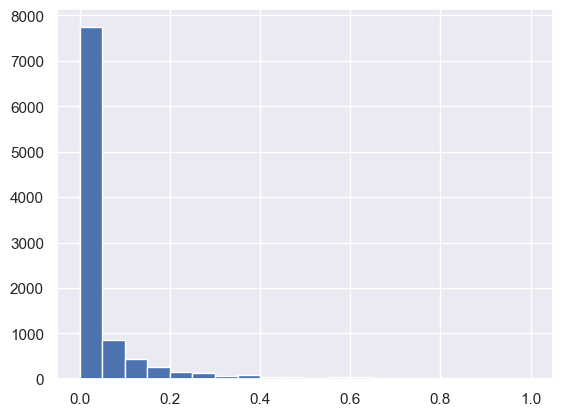

In [8]:
pd.Series(result).hist(bins=20);

In [9]:
a = np.random.binomial(1,baseline, size=sample_size)
b = np.random.binomial(1,baseline + mde, size=sample_size)

In [10]:
proportions_ztest([a.sum(), b.sum()], [len(a), len(b)], )

(-0.7642729198142753, 0.4447046196356115)

In [11]:
sps.chisquare([b.sum(), len(b) - b.sum()], [a.sum(), len(a) - a.sum()])

Power_divergenceResult(statistic=1.1980724493187105, pvalue=0.27370727417821317)

In [12]:
sps.chi2_contingency([[b.sum(), len(b) - b.sum()], [a.sum(), len(a) - a.sum()]])

(0.5036485368238923,
 0.477901358660342,
 1,
 array([[211., 819.],
        [211., 819.]]))

In [14]:
sps.ttest_ind(a, b)

Ttest_indResult(statistic=-0.7640101486847903, pvalue=0.4449487769417205)

In [15]:
sps.ttest_ind_from_stats(
    a.mean(), a.std(), a.shape[0],
    b.mean(), b.std(), b.shape[0]
)

Ttest_indResult(statistic=-0.7643812976737382, pvalue=0.4447276818819862)

In [10]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [11]:
df.pickup = pd.to_datetime(df.pickup)
df.pickup

0      2019-03-23 20:21:09
1      2019-03-04 16:11:55
2      2019-03-27 17:53:01
3      2019-03-10 01:23:59
4      2019-03-30 13:27:42
               ...        
6428   2019-03-31 09:51:53
6429   2019-03-31 17:38:00
6430   2019-03-23 22:55:18
6431   2019-03-04 10:09:25
6432   2019-03-13 19:31:22
Name: pickup, Length: 6433, dtype: datetime64[ns]

In [17]:
df.pickup.dt.second

0        9
1       55
2        1
3       59
4       42
        ..
6428    53
6429     0
6430    18
6431    25
6432    22
Name: pickup, Length: 6433, dtype: int64

In [1]:
s = 'JfvjjklgjhjgGgkGGGKgKGkgKLggKJkhkHgGkJhLKHGGHFFJgGjHGjk'

In [2]:
from functools import reduce
reduce(lambda cnt, char: cnt + ('a' <= char <= 'z'), s, 0)

28

In [3]:
len([1 for char in s if 'a' <= char <= 'z'])

28

In [6]:
sum(char.islower() for char in s)

28

In [7]:
with open('untitled.txt') as f:
    a = f.read()
    print(a)

ghjkd
sghg fghgh dghg
ghgf fg


In [14]:
with open('untitled.txt') as f:
    for a in f:
        print(a)

ghjkd

sghg fghgh dghg

ghgf fg


In [9]:
with open('untitled.txt') as f:
    for a in f.readlines():
        print(a)

ghjkd

sghg fghgh dghg

ghgf fg


In [12]:
with open('untitled.txt') as f:
    while True:
        line = f.readline(); 
        if not line: 
            break
        print(line)

ghjkd

sghg fghgh dghg

ghgf fg


In [3]:
df = sns.load_dataset('taxis')
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [10]:
df.groupby('pickup_borough').agg(avg_distance=('distance', 'mean'), passenger_amount=('passengers', 'sum'))

,avg_distance,passenger_amount
pickup_borough,,
Bronx,5.725859,118
Brooklyn,4.058668,502
Manhattan,2.349723,8250
Queens,7.465830,1001


In [8]:
sn = 7
guess = 0
while guess != sn:
    guess = int(input("Давай число: "))
print("Поздравлямс!")

Давай число:  7


Поздравлямс!


In [5]:
df = pd.DataFrame({'math_score': range(1, 6), 'phys': range(6, 11), 'score_of_lang': range(11, 16)})
df

,math_score,phys,score_of_lang
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [6]:
df.filter(like = 'score').sum(axis=1)

0    12
1    14
2    16
3    18
4    20
dtype: int64

In [7]:
dct = {'a': 1, 'b': 2, 'c': 3}

In [8]:
[*dct.items()]

[('a', 1), ('b', 2), ('c', 3)]

In [9]:
 list(dct.items())

[('a', 1), ('b', 2), ('c', 3)]

In [11]:
df = pd.DataFrame({'math_score': range(1, 6), 'phys': range(6, 11), 'score_of_lang': range(11, 16)})
df

,math_score,phys,score_of_lang
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [14]:
df = df.rename(columns={'score_of_lang': 'math_score'})
df

,math_score,phys,math_score
0,1,6,11
1,2,7,12
2,3,8,13
3,4,9,14
4,5,10,15


In [16]:
df.loc[:, ~df.columns.duplicated()]

,math_score,phys
0,1,6
1,2,7
2,3,8
3,4,9
4,5,10


In [20]:
df[df.columns.drop_duplicates()]

,math_score,math_score,phys
0,1,11,6
1,2,12,7
2,3,13,8
3,4,14,9
4,5,15,10


In [22]:
import sqlite3
conn = sqlite3.connect('chinook.db')
df = pd.read_sql("SELECT * FROM invoices;", conn)
df.head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86


In [24]:
with sqlite3.connect('chinook.db') as conn:
    df = pd.read_sql('SELECT * FROM genres', conn)
df.head()

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll


In [7]:
import json

In [ ]:
pd.read_json('json_file.json', orient='columns')

In [ ]:
from flask import Flask
app = Flask('test')

@app.route('/ping', methods=['GET'])
def ping():
    return 'PONG'

app.run(debug=True, use_reloader=False, host='0.0.0.0', port=9696)

 * Serving Flask app "test" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on all addresses.
 * Running on http://192.168.0.190:9696/ (Press CTRL+C to quit)
192.168.0.190 - - [27/Apr/2024 17:30:17] "GET / HTTP/1.1" 404 -
192.168.0.190 - - [27/Apr/2024 17:30:18] "GET /favicon.ico HTTP/1.1" 404 -
192.168.0.190 - - [27/Apr/2024 17:30:42] "GET /ping HTTP/1.1" 200 -
127.0.0.1 - - [27/Apr/2024 17:31:10] "GET /ping HTTP/1.1" 200 -
127.0.0.1 - - [27/Apr/2024 17:31:11] "GET /favicon.ico HTTP/1.1" 404 -


In [3]:
from flask import Flask, request, jsonify

app = Flask('churn')

# приложение, внутри которого можно расположить ML-модель, например
@app.route('/compute', methods=['POST'])  # получим ответ по localhost:9696/compute
def foo():
    x = request.get_json()  # получаем вход
    result = {  # вычисляем выход
            'квадрат': x**2,
            'куб': x**3}
    return jsonify(result)  # вернем в виде jsonа

'''
запускаем приложение на нужных хосте и порте.
Без use_reloader=False в ноутбуке не хотел запускаться.
host 0.0.0.0 делает сервис общедоступным.
Лучше этот код сделать в виде отдельного файла, чтобы запустить его вне ноутбука.
Для этого здесь добавить if __name__ == '__main__': .
Я просто в другом ноуте запускал эту ячейку.
'''
app.run(debug=True, use_reloader=False, host='0.0.0.0', port=9696)

 * Serving Flask app "churn" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on all addresses.
 * Running on http://192.168.0.190:9696/ (Press CTRL+C to quit)
192.168.0.190 - - [27/Apr/2024 19:59:29] "GET / HTTP/1.1" 404 -
192.168.0.190 - - [27/Apr/2024 20:00:19] "GET /predict HTTP/1.1" 405 -


In [8]:
import requests

number = 5
url = 'http://localhost:9696/compute'  # url нашего веб-сервиса
response = requests.post(url, json=number)  # делаем post-запрос, передавая число
result = response.json()  # получаем из ответного jsonа данные
result

{'квадрат': 25, 'куб': 125}

In [ ]:
# докерфайл для модели машинного обучения

FROM python:3.7.5-slim
ENV PYTHONUNBUFFERED=TRUE
RUN pip --no-cache-dir install pipenv
WORKDIR /app
COPY ["Pipfile", "Pipfile.lock", "./"]
RUN pipenv install --deploy --system && rm -rf /root/.cache
COPY ["*.py", "churn-model.bin", "./"]
EXPOSE 9696
ENTRYPOINT ["ginicorn", "--bind", "0.0.0.0:9696", "churn_serving:app"]

Задаем базовый образ.  
Устанавливаем настройки для просмотра логов Python.  
Устанавливаем Pipenv.  
Устанавливаем рабочий каталог /app.  
Копируем файлы Pipenv.  
Устанавливаем зависимости.  
Копируем наш код и модель.  
Открываем порт.  
Указываем, как запустить наш сервис.  

Запускаем командой:  
docker run -it -p 9696:9696 churn-prediction:latest

In [31]:
s1 = pd.Series([0, None, 2, 3, 4, None, 6, 7, 8, None],
               index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'h', 'k'])

s2 = pd.Series([None, 1, 2, None, 4, 5, 6, None, 8, None],
               index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'i', 'h', 'k'])

In [32]:
s1[s1.isna()] = s2
s1

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    6.0
i    7.0
h    8.0
k    NaN
dtype: float64

In [33]:
s2[s2.index.difference(s1.index)]

Series([], dtype: float64)

In [34]:
s1.combine_first(s2) 

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
g    6.0
i    7.0
h    8.0
k    NaN
dtype: float64

In [38]:
data = {
        'Организация': ['Рога', 'Рога', 'Копыта', 'Копыта'],
        'Год': [2018, 2019, 2020, 2021],
        'Земельный налог': [5000, 6000, 4000, 2000],
        'Налог на доб. стоимость': [20000,  21000, 22000, 23000],
        'Налог на доход ФЛ': [180000,  190000,  200000, 210000],
        'Налог на имущество': [54000, 54500,  55000,  55500],
        'Налог на прибыль': [490000,  520000,  550000,  580000],
        'Транспортный налог': [25000,  20000,  28000, 20000]}

df = pd.DataFrame(data)
df

,Организация,Год,Земельный налог,Налог на доб. стоимость,Налог на доход ФЛ,Налог на имущество,Налог на прибыль,Транспортный налог
0,Рога,2018,5000,20000,180000,54000,490000,25000
1,Рога,2019,6000,21000,190000,54500,520000,20000
2,Копыта,2020,4000,22000,200000,55000,550000,28000
3,Копыта,2021,2000,23000,210000,55500,580000,20000


In [40]:
pd.melt(
    df,
    id_vars=['Организация', 'Год'],
    var_name='Типы налогов',
    value_name='Сумма'
)

,Организация,Год,Типы налогов,Сумма
0,Рога,2018,Земельный налог,5000
1,Рога,2019,Земельный налог,6000
2,Копыта,2020,Земельный налог,4000
3,Копыта,2021,Земельный налог,2000
4,Рога,2018,Налог на доб. стоимость,20000
5,Рога,2019,Налог на доб. стоимость,21000
6,Копыта,2020,Налог на доб. стоимость,22000
7,Копыта,2021,Налог на доб. стоимость,23000
8,Рога,2018,Налог на доход ФЛ,180000
9,Рога,2019,Налог на доход ФЛ,190000
